# Análise da coleta das ementas

> Dataset: "ementa_ds.zip"


Carregando apenas os dados do **código do processo**, **número** e **texto da ementa**.<br>
As demais colunas não possuem correlação no domínio do probrema.


In [1]:
import pandas as pd

colunas = ['CODIGO', 'PROCESSO', 'EMENTA']

df = pd.read_csv('../data/ementa_ds.zip', compression='zip', header=0, sep=',', quotechar='"', usecols=colunas)

Quantidade de registros e colunas

In [2]:

df.shape

(142606, 3)

Verificado abaixo que existem repetições de código de processo, o que implica na decisão de qual a ementa correta para classificação.

In [3]:
df.describe()

,CODIGO,PROCESSO,EMENTA
count,142606,142606,142606
unique,141746,121419,126576
top,P0000XZ0B0000,40203198220178240000,<br> EMBARGOS DE DECLARAÇÃO. OMISSÃO NÃO CAR...
freq,3,6,244


In [4]:
df.head()

,CODIGO,PROCESSO,EMENTA
0,P00013PDI0000,40164293820178240000,<br> AGRAVO DE INSTRUMENTO. PROCEDIMENTOS ES...
1,P00018R6T0000,03015688220178240019,<br> APELAÇÃO CÍVEL. AÇÃO DECLARATÓRIA DE IN...
2,P00018MLD0000,03000499620188240032,<br> APELAÇÃO CÍVEL. AÇÃO CONDENATÓRIA À IND...
3,P00017KH90000,03018292520188240015,<br> APELAÇÃO CÍVEL. AÇÃO DE INDENIZAÇÃO POR...
4,P00017GGU0000,03103212420168240064,<br> APELAÇÃO CÍVEL. AÇÃO REVISIONAL DE CONT...


Exemplo do texto da ementa:

In [5]:
df['EMENTA'][0]

'<br>   AGRAVO DE INSTRUMENTO. PROCEDIMENTOS ESPECIAIS. AÇÃO DE EXIGIR CONTAS. SEGUNDA FASE. DECISÃO QUE DEIXA DE APRECIAR PLEITO DE DILAÇÃO DE PRAZO PARA A PRESTAÇÃO DE CONTAS E REPUTA EXTEMPORÂNEOS OS CÁLCULOS APRESENTADOS. INSURGÊNCIA DA REQUERIDA. AUSÊNCIA DE INTIMAÇÃO PARA APRESENTAR AS CONTAS. INVIABILIDADE DE SE REPUTAREM TARDIAS AS CONTAS PRESTADAS ESPONTANEAMENTE.<br>   RECURSO CONHECIDO E PROVIDO.<br>'

Mostrando que os dados não contém valores nulos como também o tamanho ocupado em memória.

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142606 entries, 0 to 142605
Data columns (total 3 columns):
CODIGO      142606 non-null object
PROCESSO    142606 non-null object
EMENTA      142606 non-null object
dtypes: object(3)
memory usage: 212.9 MB


Média da quantidade de caracteres do texto da ementa.

In [7]:
df['EMENTA'].str.len().mean()

1334.4679746995218

Apresentação das palavras mais frequentes

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words

vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words=get_stop_words("pt"))
vz = vectorizer.fit_transform(list(df['EMENTA']))

tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

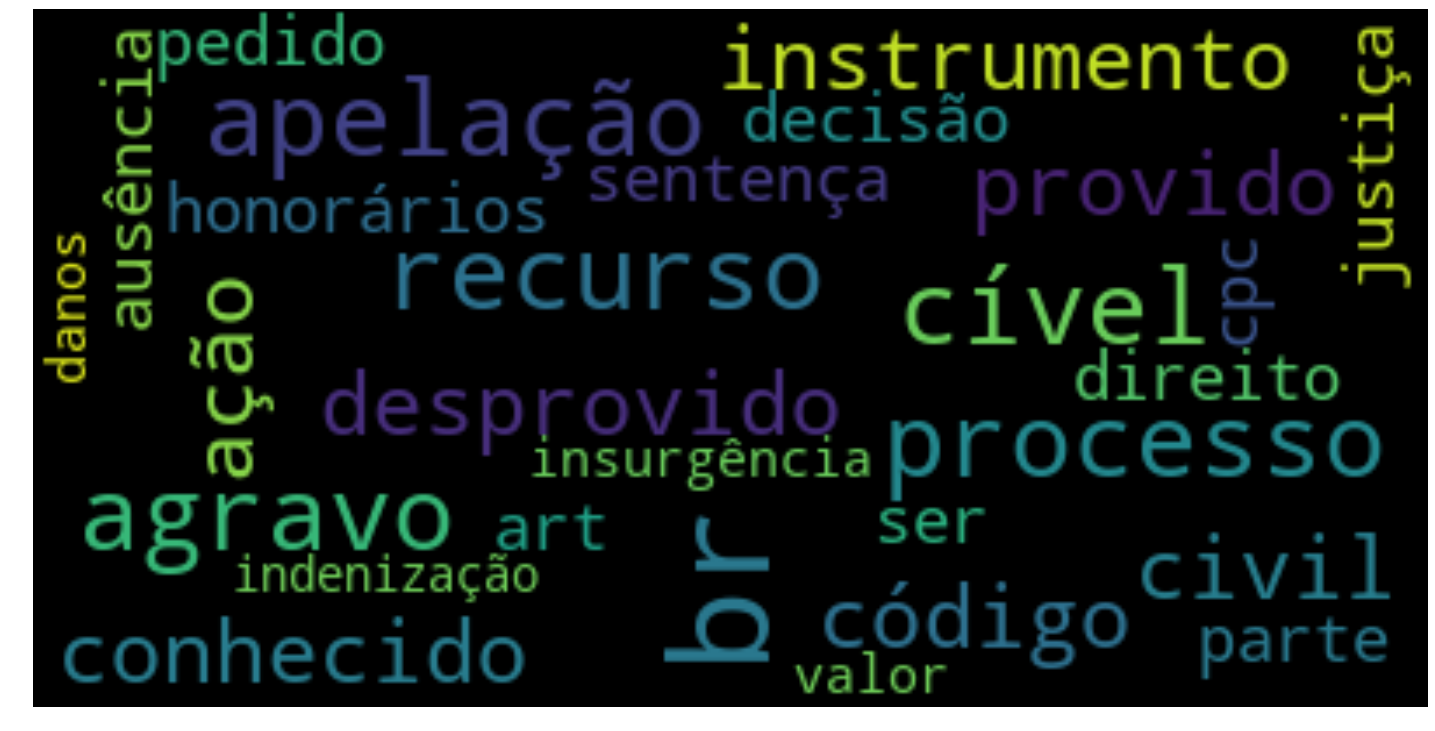

In [10]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))